<center>
<img src='https://www.seduc.ce.gov.br/wp-content/uploads/sites/37/2018/10/001.jpg' /><br />
<i></i>
</center>

### O SPAECE (Sistema Permanente de Avaliação da Educação Básica do Ceará) é uma iniciativa do Governo do Estado do Ceará, através da Secretaria da Educação (SEDUC), para avaliar o desempenho dos estudantes das escolas públicas estaduais. O objetivo do SPAECE é monitorar a qualidade da educação e fornecer informações que possam subsidiar políticas públicas e estratégias pedagógicas para a melhoria do ensino. O SPAECE avalia estudantes de diversas etapas da educação básica, incluindo os anos finais do Ensino Fundamental (5° e 9° anos) e o 3° ano do Ensino Médio. As avaliações focam principalmente nas áreas de Língua Portuguesa e Matemática, buscando verificar as competências e habilidades dos alunos nessas disciplinas.

### Resultados do SPAECE 2018 para Alunos do 3° Ano do Ensino Médio

##### Na edição de 2018 do SPAECE, os resultados para os alunos do 3° ano do Ensino Médio foram analisados considerando os níveis de proficiência em Língua Portuguesa e Matemática. Os dados são apresentados em níveis de desempenho que vão de "Muito Crítico" a "Desejável".

#### - Língua Portuguesa:

##### Desempenho Geral: A maioria dos alunos se encontrava nos níveis "Crítico" e "Intermediário", com uma porcentagem menor atingindo os níveis mais altos de proficiência ("Adequado" e "Desejável").
##### Distribuição de Níveis: Uma pequena fração dos alunos atingiu o nível "Desejável", que representa uma proficiência adequada para a conclusão do Ensino Médio e preparação para o ensino superior ou mercado de trabalho.

#### - Matemática:

##### Desempenho Geral: Similar à Língua Portuguesa, a maioria dos estudantes ficou nos níveis "Crítico" e "Intermediário".
##### Distribuição de Níveis: Poucos alunos alcançaram os níveis "Adequado" e "Desejável", indicando que a Matemática é uma área com maiores desafios para os alunos do 3° ano do Ensino Médio.

## Experimento

#### Os resultados do SPAECE 2018 apontam para a necessidade de intervenções mais robustas e direcionadas no ensino médio, especialmente nas áreas de Língua Portuguesa e Matemática. Exte experimento tem como objetivo aplicar técnicas de mineração de dados e Inteligência Artificial para correlacionar os dados coletados e encontrar padrões de associações, além de observar o desempenho de diferentes algoritmos de associação. Os resultados obtidos podem auxiliar as escolas e a Secretaria da Educação a desenvolver ações específicas para melhorar a qualidade de ensino, como:

##### - Formação Continuada de Professores: Investir na capacitação dos professores para melhorar as práticas pedagógicas.
##### - Programas de Reforço Escolar: Implementar programas de reforço e recuperação para alunos com dificuldades de aprendizagem.
##### - Apoio e Monitoramento: Fortalecer o acompanhamento pedagógico e psicológico dos estudantes para identificar e intervir precocemente em dificuldades.
##### - Incentivo ao Uso de Tecnologias: Utilizar ferramentas tecnológicas e metodologias inovadoras que possam tornar o aprendizado mais atraente e eficiente.

# 1- Carregar e Formatar Dataset

#### Neste passo, o objetivo é carregar o dataset, lidar com caracteres especiais, formatar e normalizar os dados, garantindo que estejam prontos para análise e modelagem.

In [107]:
# Modulos Python

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, Markdown


### 1.1 Carregar os Dados
#### Primeiro, carregamos o dataset e lidamos com possíveis problemas de codificação de caracteres, especialmente se o arquivo contém caracteres especiais.

##### **"novo_SPAECE_2018.csv"** é o dataset inicial, não codificado.
##### **"SPAECE_2018_codificado.csv"** é o dataset codificado de acordo com o documento **"Codificação.pdf"** e com os valores numéricos das notas e proeficiencias em formato **float**. Aplicável em problemas de Regressão.
##### **"CLASS.csv**  é o dataset codificado de acordo com o documento **"Codificação.pdf"** e com os valores das notas e proeficiencias distribuidas em 5 grupos ou classes (1 = pontuação mínima / 5 = pontuação máxima). Aplicável em problemas de Classificação.
##### **"Apriori.csv"** é o dataset com colunas codificadas em binários bool para aplicar em algoritmos Apriori.
##### **"PCY_binário"** é o dataset "**Apriori.csv"** no formato binário para aplicar em algoritmos PCY, FP-Growth e ECLAT.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [108]:
import chardet

# Detectar a codificação do arquivo
with open("datasets/novo_SPAECE_2018.csv", 'rb') as f:
    result = chardet.detect(f.read())

# Carregar o arquivo CSV com a codificação detectada
encoding = result['encoding']
gnetDf = pd.read_csv("datasets/novo_SPAECE_2018.csv", encoding=encoding)

### 1.2 Inspecionar os Dados
#### Depois de carregar o dataset, inspecionamos os dados para entender sua estrutura, tipos de dados e presença de valores ausentes.

#### Para visualizar o dataset

In [109]:
gnetDf

,SEXO,IDADE,FORMA��O DA M�E,FORMA��O DO PAI,ACESSO A INTERNET,NUMERO DE COMPUTADORES,INICIOU OS ESTUDOS,CURSO O ENSINO FUNDAMENTAL,REPROVOU,ABANDONOU A ESCOLA,GEST�O ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE,PROFESSORES TIRAM DUVIDAS,PROFESSORES CORRIGEM AS ATIVIDADES,TURNO ESCOLAR,NUMERO DE PONTOS EM PORTUGUES,NUMERO DE PONTOS EM MATEMATICA,PROFICIENCIA EM PORTUGUES,PROFICIENCIA EM MATEM�TICA
0,Feminino,17 anos,N�o sabe informar,Ensino Fundamental Completo,N�o,Um,Na creche (0 a 3 anos),Somente em escola p�blica,N�o,N�o,Concordo,Concordo,Concordo,Tarde,11,8,"252,9","285,73"
1,Feminino,18 anos,Nunca estudou,Ensino Fundamental Completo,N�o,Um,Na pr�-escola (4 a 5 anos),Somente em escola p�blica,N�o,N�o,Concordo,Concordo muito,Concordo muito,Tarde,16,9,"281,74","306,3"
2,Feminino,17 anos,Nunca estudou,Ensino Fundamental Completo,N�o,Um,Na pr�-escola (4 a 5 anos),Somente em escola p�blica,N�o,N�o,Concordo muito,Concordo,Concordo,Tarde,8,5,"224,17","243,4"
3,Feminino,17 anos,Nunca estudou,Ensino Fundamental Completo,N�o,Um,Na creche (0 a 3 anos),Em escola p�blica e em escola particular,N�o,N�o,Concordo pouco,Concordo pouco,Concordo pouco,Tarde,17,6,"281,61","268,13"
4,Masculino,17 anos,Nunca estudou,Ensino Fundamental Completo,N�o,Um,Na pr�-escola (4 a 5 anos),Somente em escola p�blica,N�o,N�o,Concordo,Concordo,Concordo,Tarde,18,5,"301,68","240,28"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52489,Feminino,17 anos,Ensino Fundamental Completo,N�o sabe informar,Sim,Dois ou mais,No 1� Ano / 1� s�rie do Ensino Fundamental (6 ...,Somente em escola particular,N�o,"Sim, uma vez",N�o concordo,Concordo pouco,Concordo pouco,Integral,13,7,"275,88","259,11"
52490,Feminino,19 anos,Ensino Fundamental Completo,N�o sabe informar,Sim,Dois ou mais,Na pr�-escola (4 a 5 anos),Em escola p�blica e em escola particular,N�o,N�o,Concordo muito,Concordo muito,Concordo muito,Integral,22,8,"335,27","304,96"
52491,Masculino,19 anos,Ensino Fundamental Completo,N�o sabe informar,Sim,Dois ou mais,Na pr�-escola (4 a 5 anos),Somente em escola p�blica,N�o,"Sim, uma vez",Concordo muito,Concordo,Concordo pouco,Integral,22,6,"334,7","251,84"
52492,Masculino,18 anos,Ensino Fundamental Completo,N�o sabe informar,Sim,Dois ou mais,Na pr�-escola (4 a 5 anos),Somente em escola p�blica,N�o,N�o,Concordo,Concordo,Concordo,Integral,20,8,"323,7","261,49"


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Para listar os nomes das colunas

In [110]:
print(gnetDf.columns)


Index(['SEXO', 'IDADE', 'FORMA��O DA M�E', 'FORMA��O DO PAI ',
       'ACESSO A INTERNET', 'NUMERO DE COMPUTADORES', 'INICIOU OS ESTUDOS',
       'CURSO O ENSINO FUNDAMENTAL', 'REPROVOU', 'ABANDONOU A  ESCOLA',
       'GEST�O ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE',
       'PROFESSORES TIRAM DUVIDAS ', 'PROFESSORES CORRIGEM AS ATIVIDADES ',
       'TURNO ESCOLAR', 'NUMERO DE PONTOS EM PORTUGUES ',
       'NUMERO DE PONTOS EM MATEMATICA', 'PROFICIENCIA EM PORTUGUES',
       'PROFICIENCIA EM MATEM�TICA'],
      dtype='object')


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Para verificar a porcentagem de dados faltantes de uma coluna

In [111]:
coluna_desejada = 'IDADE'

# Calcule a porcentagem de valores faltantes ou nulos
porcentagem_faltantes = gnetDf[coluna_desejada].isnull().mean() * 100

# Exiba a porcentagem de valores faltantes ou nulos
print(f"Porcentagem de valores faltantes ou nulos na coluna {coluna_desejada}: {porcentagem_faltantes:.2f}%")

Porcentagem de valores faltantes ou nulos na coluna IDADE: 0.00%


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Para visualizar uma coluna

In [112]:
# 
print(gnetDf['SEXO'])

0         Feminino
1         Feminino
2         Feminino
3         Feminino
4        Masculino
           ...    
52489     Feminino
52490     Feminino
52491    Masculino
52492    Masculino
52493    Masculino
Name: SEXO, Length: 52494, dtype: object


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Para verificar o número de colunas e instâncias

In [113]:
print('Number of Rows (Samples): %s' % str((gnetDf.shape[0])))
print('Number of Columns (Features): %s' % str((gnetDf.shape[1])))

Number of Rows (Samples): 52494
Number of Columns (Features): 18


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Verificar quais colunas têm dados faltantes

In [114]:
colunas_faltantes = []
for coluna in gnetDf.columns:
    if gnetDf[coluna].isnull().any():
        colunas_faltantes.append(coluna)

# Exiba as colunas com dados faltantes
print(colunas_faltantes)

[]


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 1.3 Limpar e Formatar os Dados
#### Lidar com valores ausentes, corrigir problemas de codificação e transformar colunas categóricas em numéricas conforme necessário.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 1.3.1 Mapear Colunas Categóricas

#### Transformar valores categóricos em numéricos, conforme as instruções especificadas anteriormente no arquivo 'Codificação.pdf' e renomear colunas.

In [115]:
# Renomear colunas para corrigir possíveis problemas de codificação

gnetDf.rename(columns={
    'SEXO': 'SEXO',
    'IDADE': 'IDADE',
    'FORMA��O DA M�E': 'FORMACAO DA MAE',
    'FORMA��O DO PAI ': 'FORMACAO DO PAI',
    'ACESSO A INTERNET': 'ACESSO A INTERNET',
    'NÚMERO DE COMPUTADORES': 'NUMERO DE COMPUTADORES',
    'INICIOU OS ESTUDOS': 'INICIOU OS ESTUDOS',
    'CURSO O ENSINO FUNDAMENTAL': 'CURSO O ENSINO FUNDAMENTAL',
    'REPROVOU': 'REPROVOU',
    'ABANDONOU A  ESCOLA': 'ABANDONOU A ESCOLA',
    'GEST�O ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE': 'GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE',
    'PROFESSORES TIRAM DUVIDAS ': 'PROFESSORES TIRAM DUVIDAS',
    'PROFESSORES CORRIGEM AS ATIVIDADES ': 'PROFESSORES CORRIGEM AS ATIVIDADES',
    'TURNO ESCOLAR': 'TURNO ESCOLAR',
    'NUMERO DE PONTOS EM PORTUGUES ': 'NUMERO DE PONTOS EM PORTUGUES',
    'NUMERO DE PONTOS EM MATEMATICA': 'NUMERO DE PONTOS EM MATEMATICA',
    'PROFICIENCIA EM PORTUGUES': 'PROFICIENCIA EM PORTUGUES',
    'PROFICIENCIA EM MATEM�TICA': 'PROFICIENCIA EM MATEMATICA'
}, inplace=True)

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [116]:
# Verificar novamente os nomes das colunas após renomear
print(gnetDf.columns)

Index(['SEXO', 'IDADE', 'FORMACAO DA MAE', 'FORMACAO DO PAI',
       'ACESSO A INTERNET', 'NUMERO DE COMPUTADORES', 'INICIOU OS ESTUDOS',
       'CURSO O ENSINO FUNDAMENTAL', 'REPROVOU', 'ABANDONOU A ESCOLA',
       'GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE',
       'PROFESSORES TIRAM DUVIDAS', 'PROFESSORES CORRIGEM AS ATIVIDADES',
       'TURNO ESCOLAR', 'NUMERO DE PONTOS EM PORTUGUES',
       'NUMERO DE PONTOS EM MATEMATICA', 'PROFICIENCIA EM PORTUGUES',
       'PROFICIENCIA EM MATEMATICA'],
      dtype='object')


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [117]:
# Dicionários de mapeamento
sexo_mapping = {
    'Feminino': 1,
    'Masculino': 2
}

idade_mapping = {
    '17 anos': 17,
    '18 anos': 18,
    '19 anos': 19,
    '20 anos ou mais': 20
}

formacao_mae_mapping = {
    'Ensino Fundamental Completo': 3,
    'Ensino Fundamental Incompleto': 2,
    'Ensino M�dio Completo': 4,
    'Ensino Superior Completo': 5,
    'Nunca estudou': 0,
    'N�o sabe informar': 1
}

formacao_pai_mapping = formacao_mae_mapping.copy()

acesso_internet_mapping = {
    'N�o': 0,
    'Sim': 1
}

numero_computadores_mapping = {
    'Dois ou mais': 2,
    'Nenhum': 0,
    'Um': 1
}

inicio_estudos_mapping = {
    'Depois do 1� Ano do Ensino Fundamental (8 anos ou mais)': 9,
    'Na creche (0 a 3 anos)': 3,
    'Na pr�-escola (4 a 5 anos)': 5,
    'No 1� Ano / 1� s�rie do Ensino Fundamental (6 a 7 anos)': 7
}

curso_ensino_fundamental_mapping = {
    'Em escola p�blica e em escola particular': 3,
    'Somente em escola particular': 2,
    'Somente em escola p�blica': 1
}

reprovou_mapping = {
    'N�o': 0,
    'Sim, duas vezes ou mais': 2,
    'Sim, uma vez': 1
}

abandonou_escola_mapping = reprovou_mapping.copy()

gestao_escolar_mapping = {
    'Concordo': 2,
    'Concordo muito': 3,
    'Concordo pouco': 1,
    'N�o concordo': 0
}

professores_tiram_duvidas_mapping = gestao_escolar_mapping.copy()
professores_corrigem_atividades_mapping = gestao_escolar_mapping.copy()

turno_escolar_mapping = {
    'Integral': 4,
    'Manh�': 1,
    'Noite': 3,
    'Tarde': 2
}


##### Colunas codificadas de acordo com o documento "Codificação.pdf"

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [118]:
# Aplicar os mapeamentos
gnetDf['SEXO'] = gnetDf['SEXO'].map(sexo_mapping)
gnetDf['IDADE'] = gnetDf['IDADE'].map(idade_mapping)
gnetDf['FORMACAO DA MAE'] = gnetDf['FORMACAO DA MAE'].map(formacao_mae_mapping)
gnetDf['FORMACAO DO PAI'] = gnetDf['FORMACAO DO PAI'].map(formacao_pai_mapping)
gnetDf['ACESSO A INTERNET'] = gnetDf['ACESSO A INTERNET'].map(acesso_internet_mapping)
gnetDf['NUMERO DE COMPUTADORES'] = gnetDf['NUMERO DE COMPUTADORES'].map(numero_computadores_mapping)
gnetDf['INICIOU OS ESTUDOS'] = gnetDf['INICIOU OS ESTUDOS'].map(inicio_estudos_mapping)
gnetDf['CURSO O ENSINO FUNDAMENTAL'] = gnetDf['CURSO O ENSINO FUNDAMENTAL'].map(curso_ensino_fundamental_mapping)
gnetDf['REPROVOU'] = gnetDf['REPROVOU'].map(reprovou_mapping)
gnetDf['ABANDONOU A ESCOLA'] = gnetDf['ABANDONOU A ESCOLA'].map(abandonou_escola_mapping)
gnetDf['GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE'] = gnetDf['GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE'].map(gestao_escolar_mapping)
gnetDf['PROFESSORES TIRAM DUVIDAS'] = gnetDf['PROFESSORES TIRAM DUVIDAS'].map(professores_tiram_duvidas_mapping)
gnetDf['PROFESSORES CORRIGEM AS ATIVIDADES'] = gnetDf['PROFESSORES CORRIGEM AS ATIVIDADES'].map(professores_corrigem_atividades_mapping)
gnetDf['TURNO ESCOLAR'] = gnetDf['TURNO ESCOLAR'].map(turno_escolar_mapping)



In [119]:
gnetDf

,SEXO,IDADE,FORMACAO DA MAE,FORMACAO DO PAI,ACESSO A INTERNET,NUMERO DE COMPUTADORES,INICIOU OS ESTUDOS,CURSO O ENSINO FUNDAMENTAL,REPROVOU,ABANDONOU A ESCOLA,GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE,PROFESSORES TIRAM DUVIDAS,PROFESSORES CORRIGEM AS ATIVIDADES,TURNO ESCOLAR,NUMERO DE PONTOS EM PORTUGUES,NUMERO DE PONTOS EM MATEMATICA,PROFICIENCIA EM PORTUGUES,PROFICIENCIA EM MATEMATICA
0,1,17,1,3,0,1,3,1,0,0,2,2,2,2,11,8,"252,9","285,73"
1,1,18,0,3,0,1,5,1,0,0,2,3,3,2,16,9,"281,74","306,3"
2,1,17,0,3,0,1,5,1,0,0,3,2,2,2,8,5,"224,17","243,4"
3,1,17,0,3,0,1,3,3,0,0,1,1,1,2,17,6,"281,61","268,13"
4,2,17,0,3,0,1,5,1,0,0,2,2,2,2,18,5,"301,68","240,28"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52489,1,17,3,1,1,2,7,2,0,1,0,1,1,4,13,7,"275,88","259,11"
52490,1,19,3,1,1,2,5,3,0,0,3,3,3,4,22,8,"335,27","304,96"
52491,2,19,3,1,1,2,5,1,0,1,3,2,1,4,22,6,"334,7","251,84"
52492,2,18,3,1,1,2,5,1,0,0,2,2,2,4,20,8,"323,7","261,49"


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 1.3.2 Corrigir Notação de Pontos Flutuantes


##### Note que as duas últimas colunas estavam no formato errado e as casas decimais dos números estavam separados por vírgula e agora estão separados por ponto. Alguns modelos são sensiveis ao tipo de notação numérica que é aplicada ao dataset, assim como o datagrama do pandas pode encontrar problemas com a codificação dos nomes nas colunas.


In [120]:
# Formatando colunas que estão com float separados por virgula
gnetDf['PROFICIENCIA EM PORTUGUES'] = gnetDf['PROFICIENCIA EM PORTUGUES'].str.replace(',', '.').astype(float)
gnetDf['PROFICIENCIA EM MATEMATICA'] = gnetDf['PROFICIENCIA EM MATEMATICA'].str.replace(',', '.').astype(float)

In [121]:
print(gnetDf.dtypes)

SEXO                                                           int64
IDADE                                                          int64
FORMACAO DA MAE                                                int64
FORMACAO DO PAI                                                int64
ACESSO A INTERNET                                              int64
NUMERO DE COMPUTADORES                                         int64
INICIOU OS ESTUDOS                                             int64
CURSO O ENSINO FUNDAMENTAL                                     int64
REPROVOU                                                       int64
ABANDONOU A ESCOLA                                             int64
GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE      int64
PROFESSORES TIRAM DUVIDAS                                      int64
PROFESSORES CORRIGEM AS ATIVIDADES                             int64
TURNO ESCOLAR                                                  int64
NUMERO DE PONTOS EM PORTUGUES     

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 1.4 Normalizar os Dados
#### Normalizar ou padronizar os dados pode ser importante para alguns algoritmos de machine learning. Iremos aplicar se for necessário.



In [122]:
# from sklearn.preprocessing import StandardScaler

# Selecionar colunas numéricas para normalização
# numeric_cols = ['NUMERO DE PONTOS EM PORTUGUES', 'NUMERO DE PONTOS EM MATEMATICA', 'PROFICIENCIA EM PORTUGUES', 'PROFICIENCIA EM MATEMATICA']

# Inicializar o scaler
# scaler = StandardScaler()

# Aplicar a normalização
# gnetDf[numeric_cols] = scaler.fit_transform(gnetDf[numeric_cols])


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 1.5 Verificar e Salvar os Dados Preparados
#### Por fim, verificar se os dados estão corretos e salvar o dataset preparado para uso posterior.

In [123]:
# Salvar o DataFrame codificado
gnetDf.to_csv("datasets/SPAECE_2018_codificado.csv", index=False)

In [124]:
# Verificar o dataframe
gnetDf

,SEXO,IDADE,FORMACAO DA MAE,FORMACAO DO PAI,ACESSO A INTERNET,NUMERO DE COMPUTADORES,INICIOU OS ESTUDOS,CURSO O ENSINO FUNDAMENTAL,REPROVOU,ABANDONOU A ESCOLA,GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE,PROFESSORES TIRAM DUVIDAS,PROFESSORES CORRIGEM AS ATIVIDADES,TURNO ESCOLAR,NUMERO DE PONTOS EM PORTUGUES,NUMERO DE PONTOS EM MATEMATICA,PROFICIENCIA EM PORTUGUES,PROFICIENCIA EM MATEMATICA
0,1,17,1,3,0,1,3,1,0,0,2,2,2,2,11,8,252.90,285.73
1,1,18,0,3,0,1,5,1,0,0,2,3,3,2,16,9,281.74,306.30
2,1,17,0,3,0,1,5,1,0,0,3,2,2,2,8,5,224.17,243.40
3,1,17,0,3,0,1,3,3,0,0,1,1,1,2,17,6,281.61,268.13
4,2,17,0,3,0,1,5,1,0,0,2,2,2,2,18,5,301.68,240.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52489,1,17,3,1,1,2,7,2,0,1,0,1,1,4,13,7,275.88,259.11
52490,1,19,3,1,1,2,5,3,0,0,3,3,3,4,22,8,335.27,304.96
52491,2,19,3,1,1,2,5,1,0,1,3,2,1,4,22,6,334.70,251.84
52492,2,18,3,1,1,2,5,1,0,0,2,2,2,4,20,8,323.70,261.49


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 1.6 Conclusão

#### O processo de carregamento e preparação dos dados envolve diversas etapas críticas, incluindo o tratamento de caracteres especiais, a transformação de colunas categóricas em numéricas, a correção de notação de pontos flutuantes e a normalização dos dados. Esse preparo é essencial para garantir que os dados estejam em um formato adequado para análise e modelagem, facilitando a obtenção de resultados precisos e interpretáveis nos passos seguintes do projeto.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##

# 2- Explorar e visualizar os dados

#### A exploração e visualização dos dados é uma etapa fundamental para entender o comportamento das variáveis e suas relações. Utilizamos diferentes tipos de gráficos e análises estatísticas para identificar padrões, tendências e possíveis outliers.

#### Para variáveis categóricas, utilizamos gráficos de barras e boxplots categóricos.

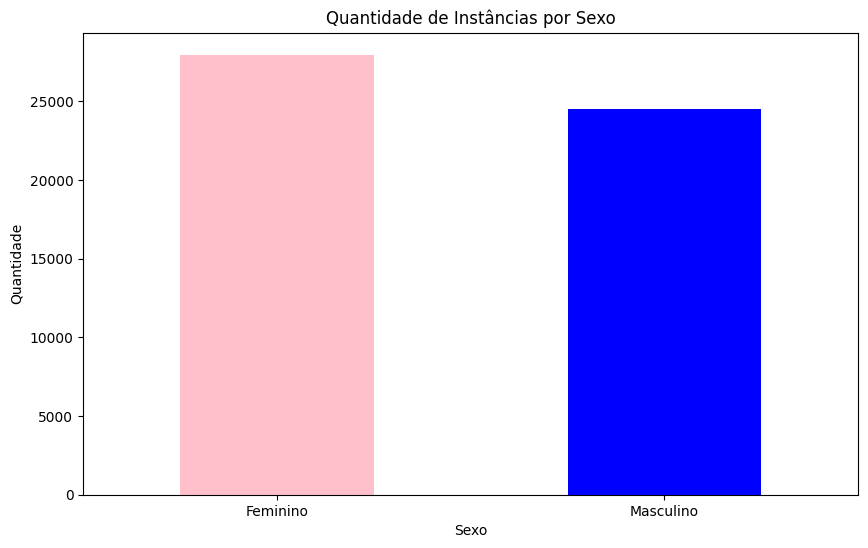

In [125]:
# Contar o número de instâncias de cada tipo na coluna 'SEXO'
sexo_counts = gnetDf['SEXO'].value_counts().sort_index()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sexo_counts.plot(kind='bar', color=['pink', 'blue'])
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Quantidade de Instâncias por Sexo')
plt.xticks(ticks=[0, 1], labels=['Feminino', 'Masculino'], rotation=0)
plt.show()

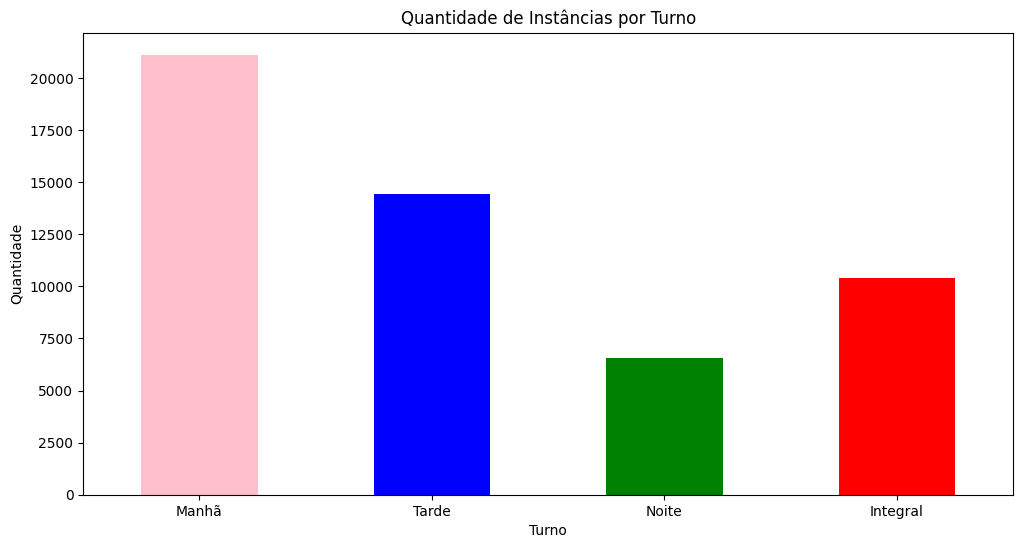

In [126]:
# Contar o número de instâncias de cada tipo na coluna 'TURNO ESCOLAR'
sexo_counts = gnetDf['TURNO ESCOLAR'].value_counts().sort_index()

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
sexo_counts.plot(kind='bar', color=['pink', 'blue', 'green', 'red'])
plt.xlabel('Turno')
plt.ylabel('Quantidade')
plt.title('Quantidade de Instâncias por Turno')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Manhã', 'Tarde', 'Noite', 'Integral'], rotation=0)
plt.show()

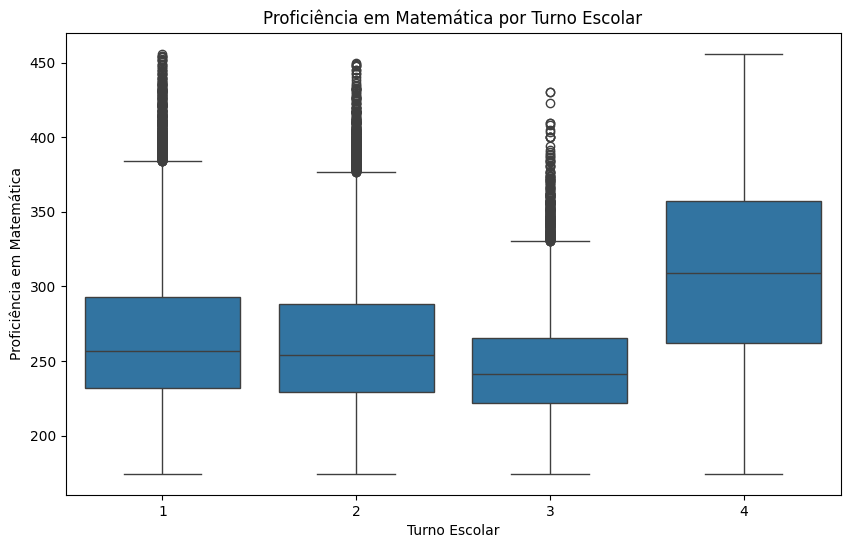

In [127]:
# Boxplot para TURNO ESCOLAR vs PROFICIENCIA EM MATEMATICA
plt.figure(figsize=(10, 6))
sns.boxplot(x=gnetDf['TURNO ESCOLAR'], y=gnetDf['PROFICIENCIA EM MATEMATICA'])
plt.title('Proficiência em Matemática por Turno Escolar')
plt.xlabel('Turno Escolar')
plt.ylabel('Proficiência em Matemática')
plt.show()

### Para começar, é útil visualizar a distribuição de cada variável individualmente. Isso pode ser feito com histogramas e boxplots.

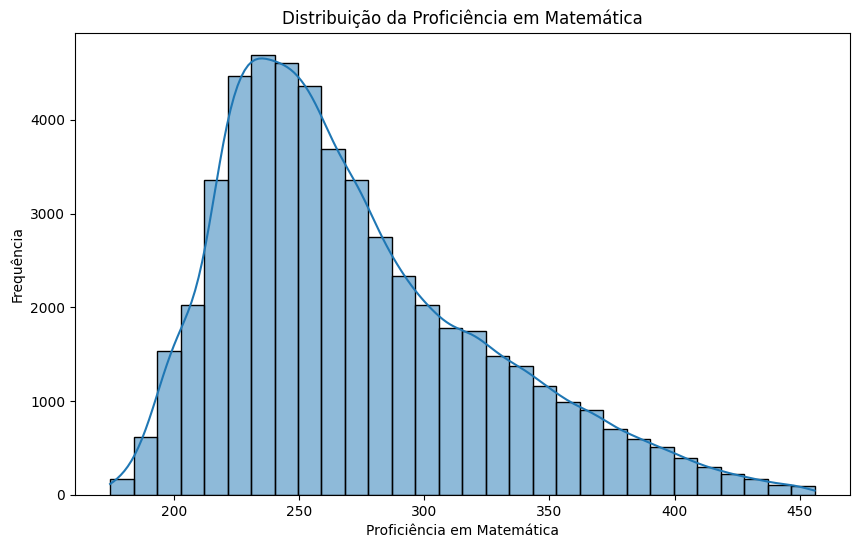

In [128]:
# Histograma para PROFICIENCIA EM MATEMATICA
plt.figure(figsize=(10, 6))
sns.histplot(gnetDf['PROFICIENCIA EM MATEMATICA'], bins=30, kde=True)
plt.title('Distribuição da Proficiência em Matemática')
plt.xlabel('Proficiência em Matemática')
plt.ylabel('Frequência')
plt.show()

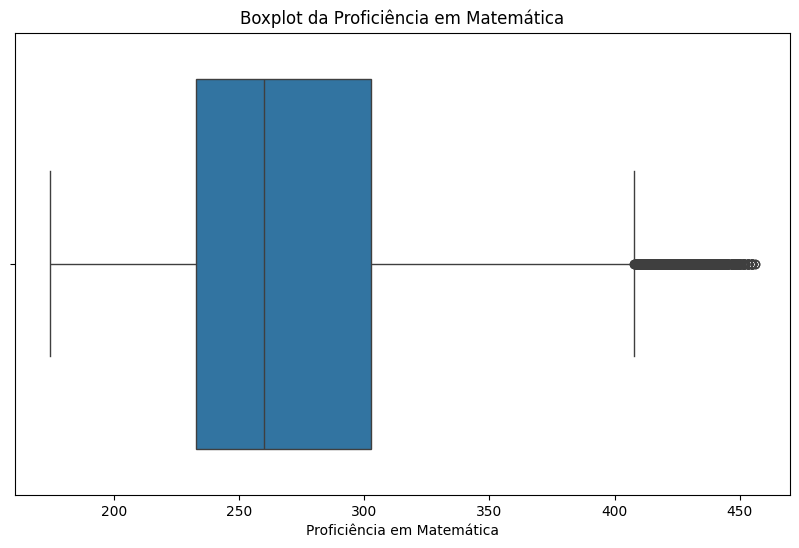

In [129]:
# Boxplot para PROFICIENCIA EM MATEMATICA
plt.figure(figsize=(10, 6))
sns.boxplot(x=gnetDf['PROFICIENCIA EM MATEMATICA'])
plt.title('Boxplot da Proficiência em Matemática')
plt.xlabel('Proficiência em Matemática')
plt.show()

### Para visualizar várias relações bivariadas ao mesmo tempo, um pairplot pode ser útil.

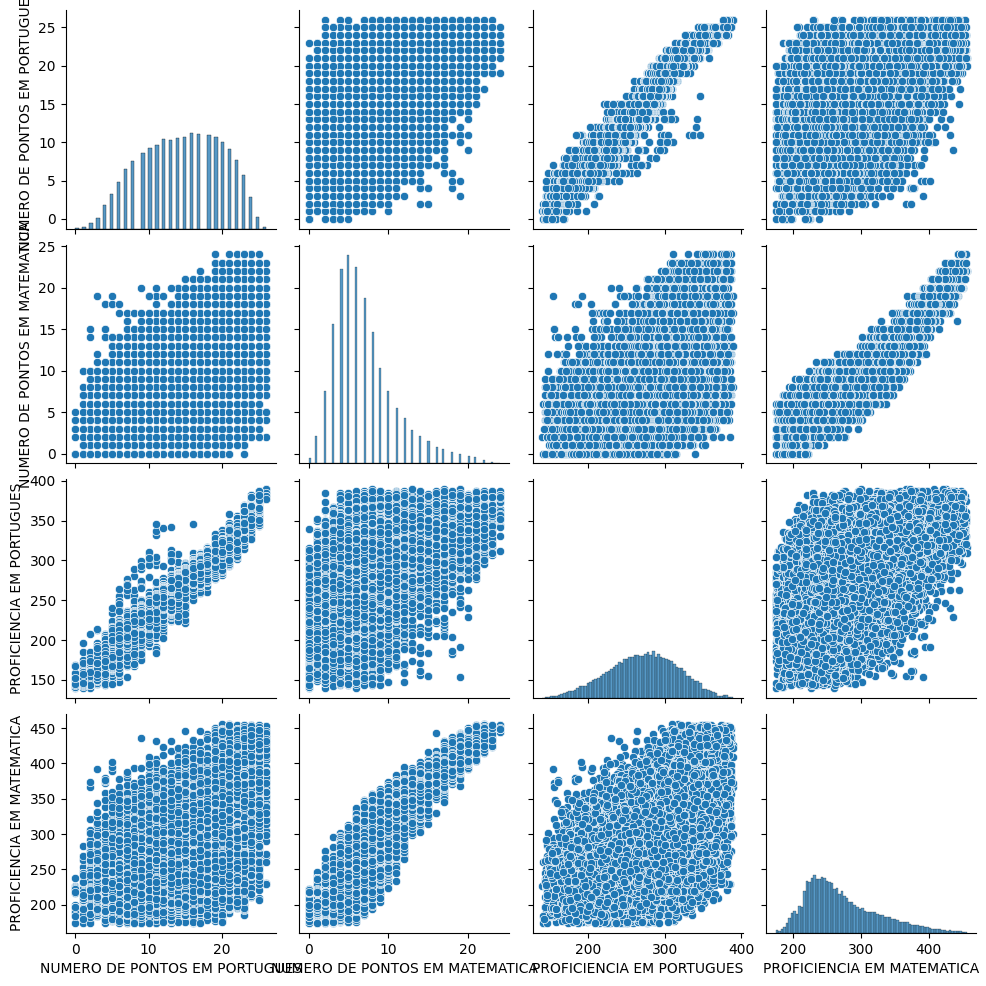

In [130]:
# Pairplot das variáveis numéricas
sns.pairplot(gnetDf[['NUMERO DE PONTOS EM PORTUGUES', 'NUMERO DE PONTOS EM MATEMATICA', 'PROFICIENCIA EM PORTUGUES', 'PROFICIENCIA EM MATEMATICA']])
plt.show()

##### Analisar a relação entre as colunas e identificar quais atributos geram maior dispersão. Dados mais dispersos têm maior peso no treinamento de MLs. Os dados de Sexo acime possuem baixa dispersão (apenas valores bináros 0 ou 1), logo possuem pouca ou nenhuma relevância para nossa ML.

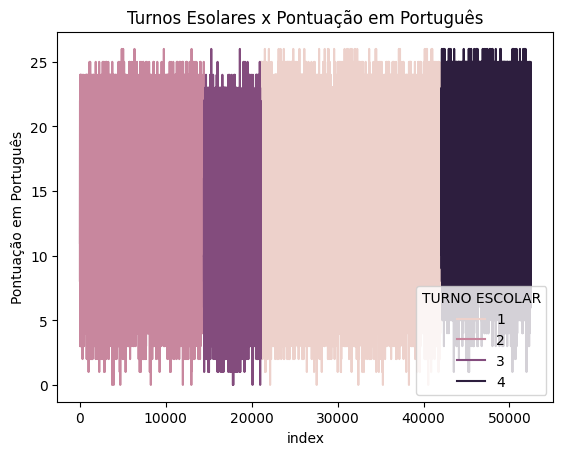

In [131]:
g = sns.lineplot(data=gnetDf.reset_index(), x='index', y='NUMERO DE PONTOS EM PORTUGUES', hue='TURNO ESCOLAR') # Podemos Ajustar os dados de x e y para visualizar a relação dos dados.
g.set(ylabel='Pontuação em Português')
g.set_title('Turnos Esolares x Pontuação em Português');

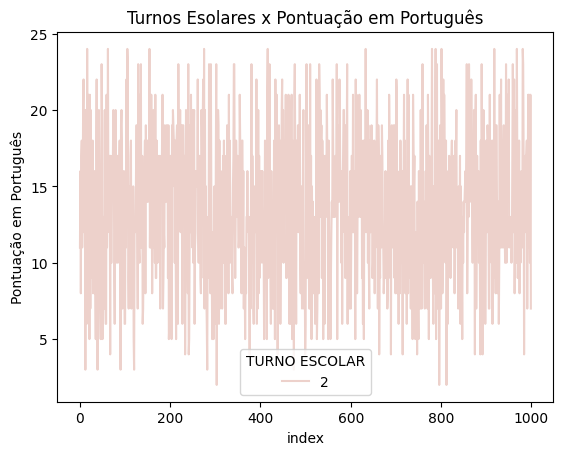

In [132]:
# Para analisar trechos do bloco, basta ajustar os valores de [100:1000] (das instâncias 100 até 1000 por exemplo)
g = sns.lineplot(data=gnetDf.reset_index()[:1000], x='index', y='NUMERO DE PONTOS EM PORTUGUES', hue='TURNO ESCOLAR') # x='COLUNA' y='COLUNA' hue='Filtro'
g.set(ylabel='Pontuação em Português')  # Rótulo do eixo y
g.set_title('Turnos Esolares x Pontuação em Português'); # Título do gráfico

##### Dados como os de pontuação e proeficiência possuem uma dispersão muito maior. Como podemos Observar nos gráficos acima. Ao relacionar as colunas podemos observar quais atributos são os melhores candidatos para treinamento de Algoritmos. Este é um método de análise mais massante e uma das maneiras de seleção de atributos.

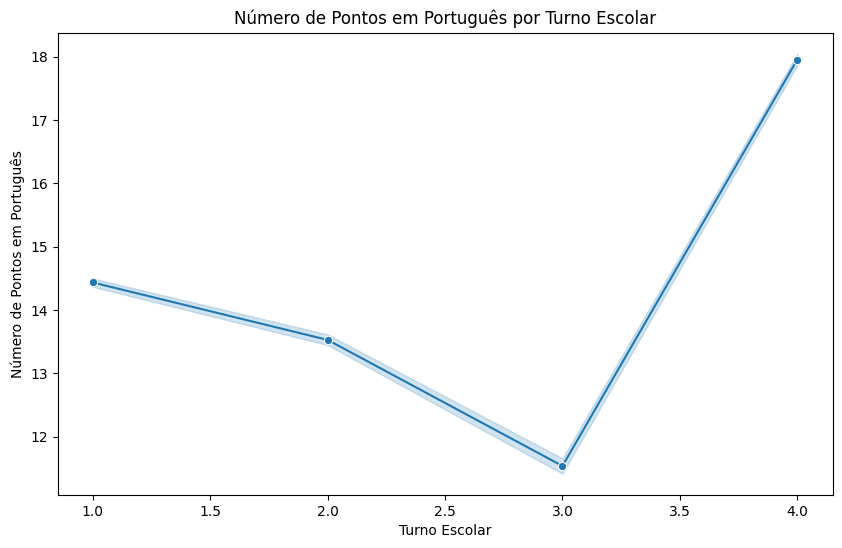

In [133]:
# Plotar o lineplot usando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=gnetDf, x='TURNO ESCOLAR', y='NUMERO DE PONTOS EM PORTUGUES', marker='o')
plt.title('Número de Pontos em Português por Turno Escolar')
plt.xlabel('Turno Escolar')
plt.ylabel('Número de Pontos em Português')
plt.show()

##### No exemplo acima relacionamos o Turno Escolar com a Pontuação na prova de Português e observamos que os alunos de Turno Escolar 4 (Turno Integral) possuem uma média de pontuação maior que os demais Turnos.

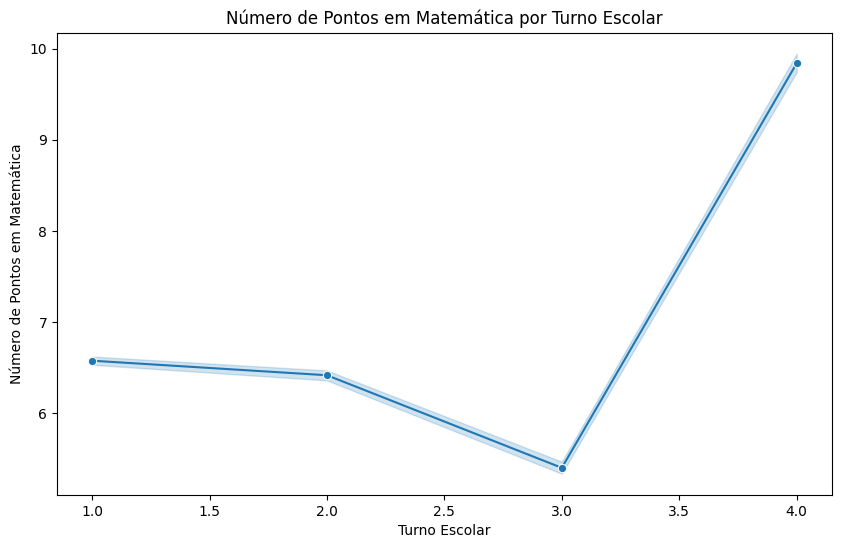

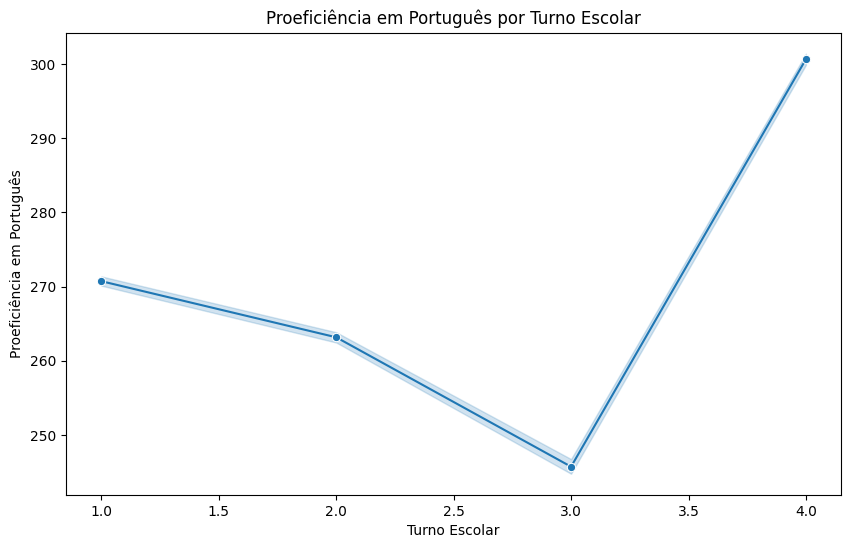

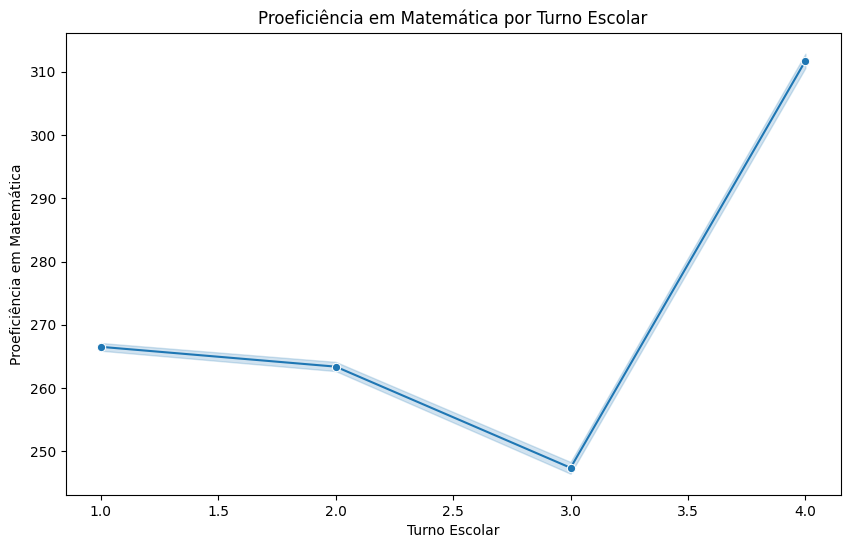

In [134]:
# Plotar o lineplot usando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=gnetDf, x='TURNO ESCOLAR', y='NUMERO DE PONTOS EM MATEMATICA', marker='o')
plt.title('Número de Pontos em Matemática por Turno Escolar')
plt.xlabel('Turno Escolar')
plt.ylabel('Número de Pontos em Matemática')
plt.show()

# Plotar o lineplot usando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=gnetDf, x='TURNO ESCOLAR', y='PROFICIENCIA EM PORTUGUES', marker='o')
plt.title('Proeficiência em Português por Turno Escolar')
plt.xlabel('Turno Escolar')
plt.ylabel('Proeficiência em Português')
plt.show()

# Plotar o lineplot usando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=gnetDf, x='TURNO ESCOLAR', y='PROFICIENCIA EM MATEMATICA', marker='o')
plt.title('Proeficiência em Matemática por Turno Escolar')
plt.xlabel('Turno Escolar')
plt.ylabel('Proeficiência em Matemática')
plt.show()

##### Como podemos observar acima, a situação se repete quando observamos os dados de Pontuação em Matemática e os dados de Proeficiência. Relações como esta são observadas pelo algoritmo de Aprendizagem de Máquina.

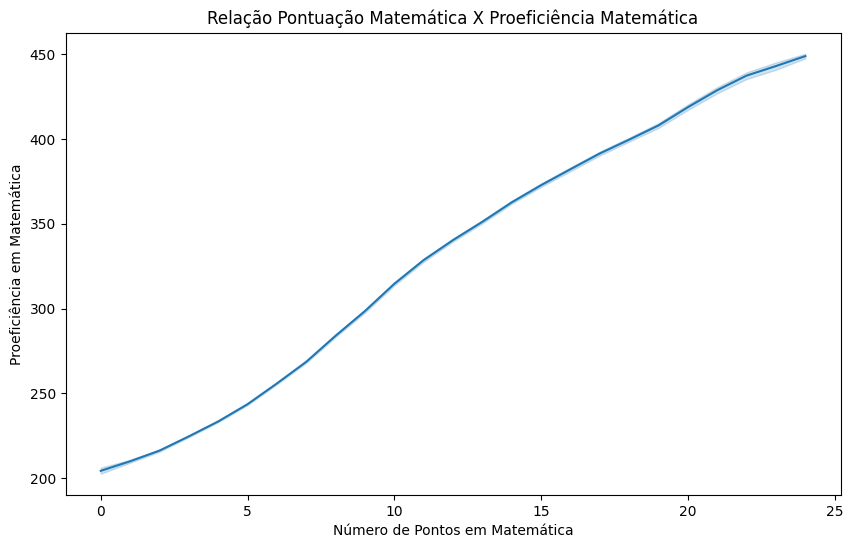

In [135]:
# Plotar o lineplot usando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=gnetDf, x='NUMERO DE PONTOS EM MATEMATICA', y='PROFICIENCIA EM MATEMATICA')
plt.title('Relação Pontuação Matemática X Proeficiência Matemática')
plt.xlabel('Número de Pontos em Matemática')
plt.ylabel('Proeficiência em Matemática')
plt.show()

##### Observe que se um dado de uma coluna está diretamente relacionado a outro, os dados são enviesados. Por exemplo: se a proeficiência em matemática é calculada com base na pontuação em matemática, estes dados podem estar enviesados. Pela lógica, se um aluno tirou nota alta em matemática então sua proeficiência também é descrita como alta. Enviesamento pode gerar erro na Acurácia e outros Scores do modelo.

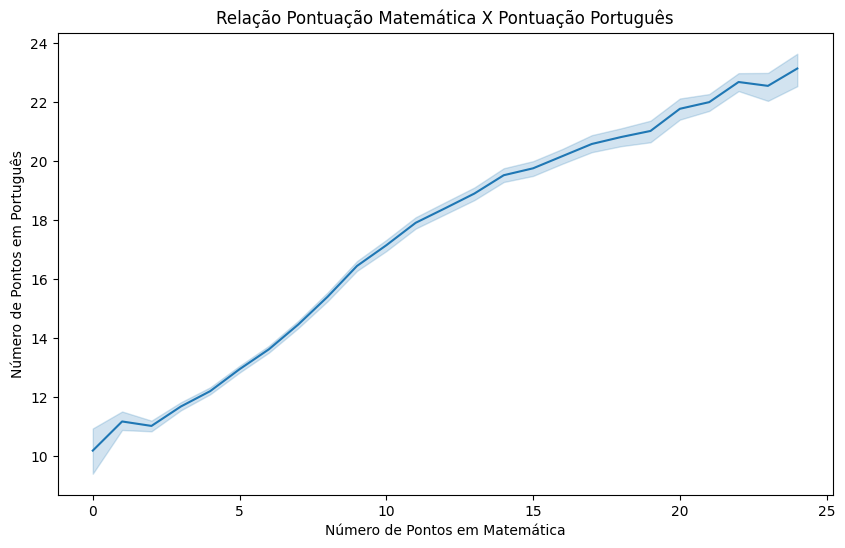

In [136]:
# Plotar o lineplot usando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=gnetDf, x='NUMERO DE PONTOS EM MATEMATICA', y='NUMERO DE PONTOS EM PORTUGUES')
plt.title('Relação Pontuação Matemática X Pontuação Português')
plt.xlabel('Número de Pontos em Matemática')
plt.ylabel('Número de Pontos em Português')
plt.show()

In [137]:
# # Plotar o lineplot usando seaborn
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=gnetDf, x='PROFICIENCIA EM PORTUGUES', y='PROFICIENCIA EM MATEMATICA')
# plt.title('Relação Proeficiência Matemática X Proeficiência Português')
# plt.xlabel('Proeficiência em Português')
# plt.ylabel('Proeficiência em Matemática')
# plt.show()

##### Podemos por exemplo, usar dados estes de pontuação e proeficiência como target de predição. Por exemplo 'proeficiência em matemática' e 'pontuação em português' para prever dados de 'pontuação matemática', descartando 'proeficiência em português' para diminuir riscos de viés.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##

# 2.1 - Matriz de correlação

### A matriz de correlação é uma representação tabular que mostra as relações lineares entre todas as variáveis em um dataset. Cada célula na matriz contém o coeficiente de correlação entre duas variáveis. O coeficiente de correlação é uma medida estatística que indica o grau de relação linear entre duas variáveis. Ele varia de -1 a 1, onde:

#### 1 indica uma correlação positiva perfeita: à medida que uma variável aumenta, a outra também aumenta de forma proporcional.
#### -1 indica uma correlação negativa perfeita: à medida que uma variável aumenta, a outra diminui de forma proporcional.
#### 0 indica ausência de correlação linear: não há relação linear entre as variáveis.



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### A matriz de correlação é frequentemente visualizada como um heatmap, onde cores diferentes representam diferentes níveis de correlação. Cores mais claras indicam correlação mais forte (positiva ou negativa), enquanto cores mais escuras indicam correlação mais fraca ou ausência de correlação. A análise da matriz de correlação pode fornecer insights valiosos, como:

### -Identificação de variáveis fortemente correlacionadas: variáveis altamente correlacionadas podem fornecer informações redundantes e podem ser candidatas para redução de dimensionalidade.
### -Identificação de relações interessantes: correlações entre variáveis podem revelar padrões ou relações importantes no dataset.
### -Seleção de variáveis para modelagem: variáveis altamente correlacionadas podem ser eliminadas para simplificar modelos e evitar multicolinearidade.

### No contexto de um projeto de análise de dados ou modelagem preditiva, a matriz de correlação é uma ferramenta poderosa para explorar as relações entre as variáveis e tomar decisões informadas sobre o processo de modelagem.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

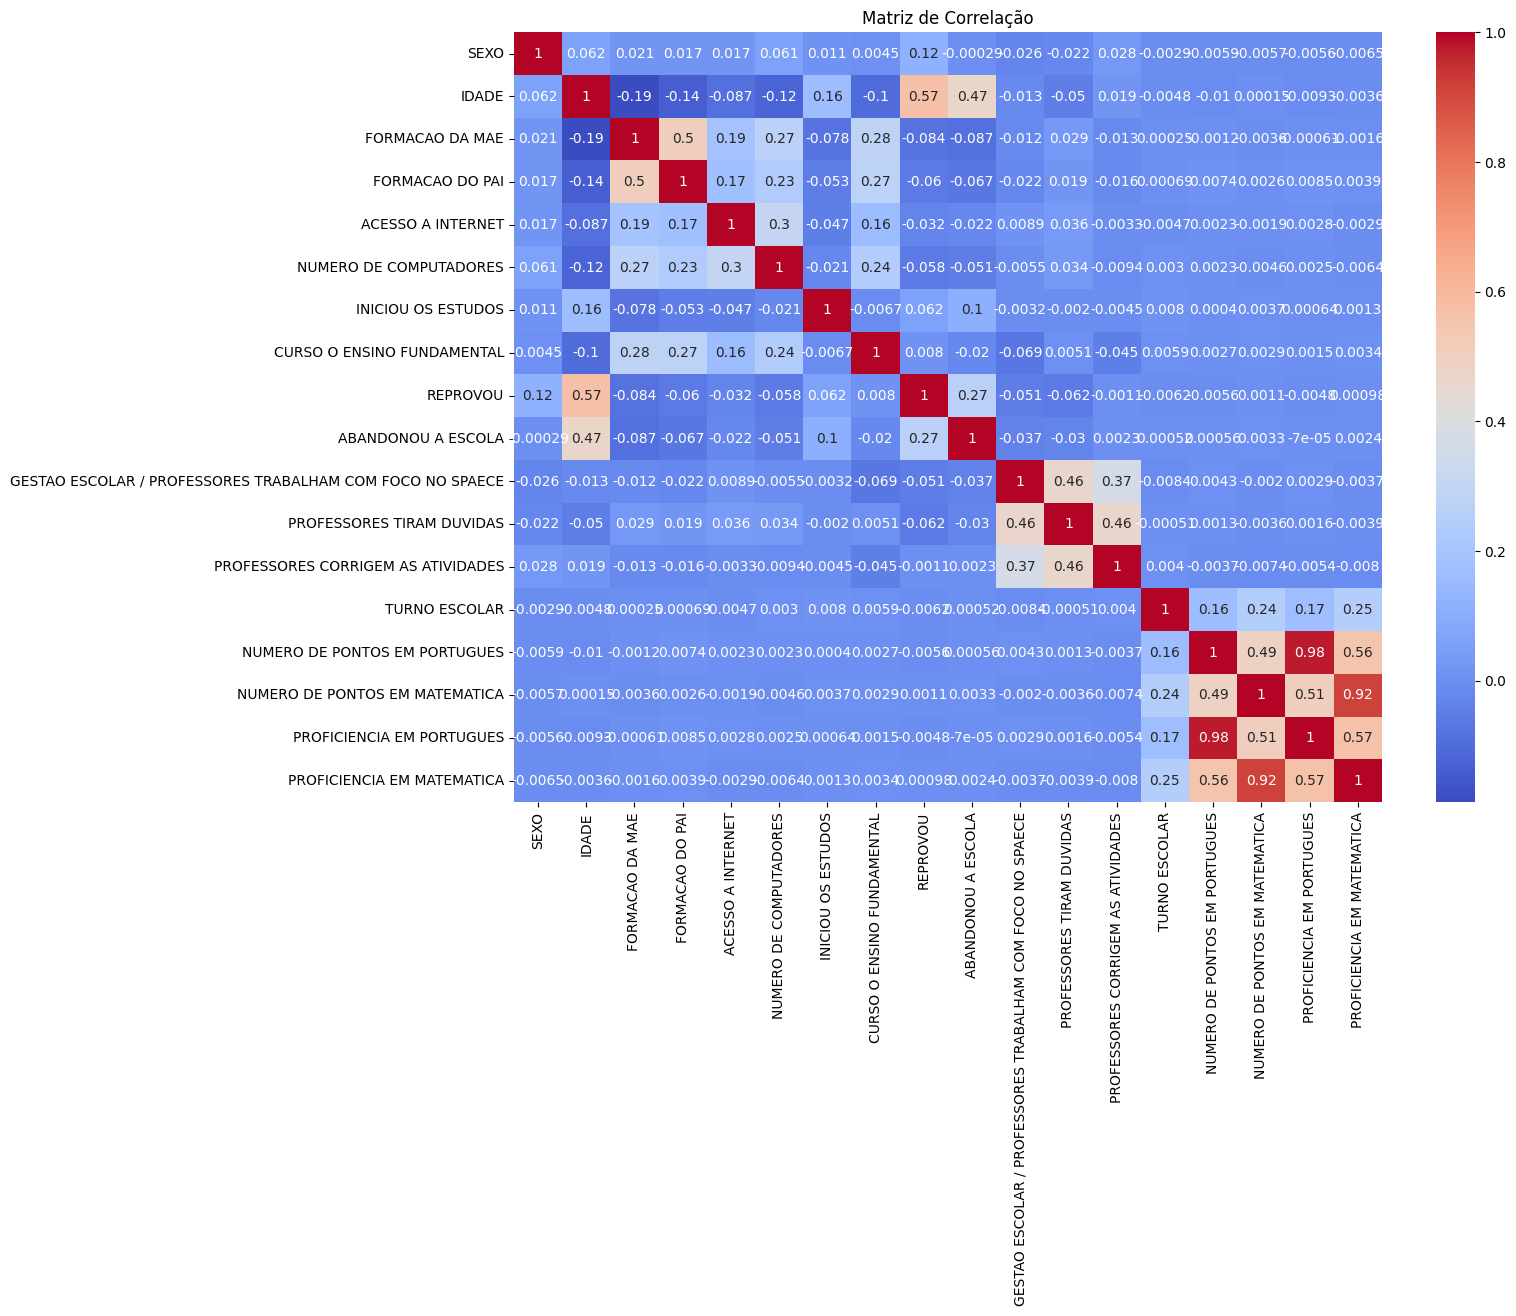

In [141]:
# Matriz de correlação
plt.figure(figsize=(14, 10))
correlation_matrix = gnetDf.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# 2.2 - Conclusão

### Explorar e visualizar os dados é um passo essencial para entender o comportamento das variáveis e suas relações. Este passo nos permite identificar padrões, tendências e outliers, além de fornecer insights valiosos que podem influenciar as próximas etapas da análise e modelagem. Utilizando uma variedade de gráficos e técnicas de visualização, podemos obter uma compreensão profunda dos dados antes de avançar para a modelagem preditiva.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##

# 3 - Seleção das Features

### Nesta etapa focamos na seleção de features, que é uma etapa crucial no processo de modelagem de dados. Selecionar as features certas pode melhorar significativamente o desempenho do modelo, reduzir o tempo de treinamento e aumentar a interpretabilidade do modelo.

#### - A seleção de features é uma etapa crítica para melhorar o desempenho e a interpretabilidade dos modelos.

#### - O método da árvore de decisão é uma abordagem intuitiva e eficaz para selecionar features, especialmente quando se deseja entender quais features são mais importantes para o modelo.

#### - As técnicas de seleção automática de features do SKlearn oferecem uma variedade de opções e podem ser ajustadas de acordo com as características específicas do problema.

#### - É importante experimentar diferentes métodos de seleção de features e avaliar o desempenho do modelo com e sem as features selecionadas para determinar a combinação mais adequada para o problema em questão.

#### - Se tivermos muitas features altamente correlacionadas podemos aplicar a Análise de Componentes Principais (PCA), o PCA pode ser usado para reduzir a dimensionalidade do conjunto de dados, mantendo a maior parte da variância original. As componentes principais resultantes podem ser consideradas as features mais relevantes.

#### - Alguns modelos de aprendizado de máquina, como regressão linear com regularização L1 (Lasso) e L2 (Ridge), incluem termos de penalização que fazem com que as features menos importantes tenham coeficientes próximos de zero. Isso pode ajudar a identificar as features mais relevantes.



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 3.1 Método da Árvore de Decisão
#### A árvore de decisão é uma técnica popular para seleção de features, especialmente em problemas de classificação e regressão. Ela funciona dividindo o conjunto de dados em subconjuntos menores com base nas features mais importantes. O critério de divisão pode ser medido usando diferentes métodos, como ganho de informação, índice Gini ou erro quadrático médio.

#### Regressão: Para problemas de regressão, as árvores de decisão são usadas para identificar as features mais importantes para prever a variável alvo. As features são selecionadas com base em sua capacidade de reduzir a variabilidade na variável de resposta.

#### Classificação: Para problemas de classificação, as árvores de decisão são usadas para classificar os dados com base nas features mais discriminativas. As features são selecionadas com base em sua capacidade de separar as diferentes classes no conjunto de dados.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 3.1.1 - Utilizando o método das Árvores de Decisão para seleção de Features

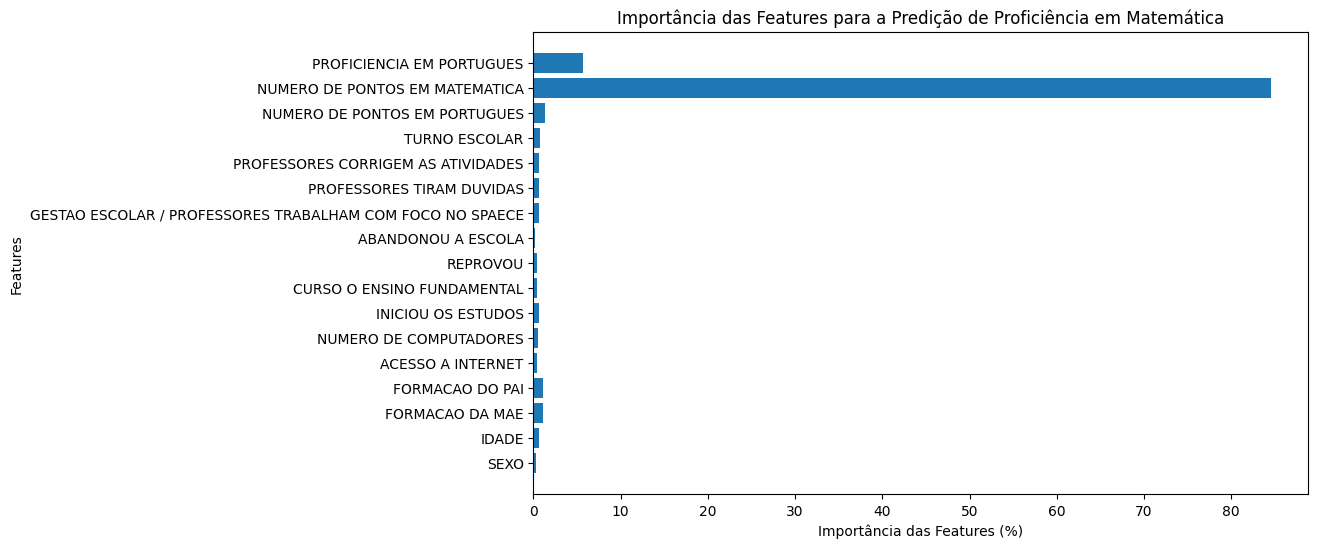

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Supondo que X é o seu conjunto de features e y é a variável target (PROFICIENCIA EM MATEMATICA)
X = gnetDf.drop(columns=['PROFICIENCIA EM MATEMATICA'])
y = gnetDf['PROFICIENCIA EM MATEMATICA']

# Divisão dos dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo de árvore de decisão para regressão
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Avaliação da importância das features
feature_importance = model.feature_importances_

import numpy as np

# Calcula a importância das features
feature_importance = model.feature_importances_

# Calcula a porcentagem relativa de cada importância
total_importance = np.sum(feature_importance)
relative_importance = (feature_importance / total_importance) * 100

# Visualização das importâncias das features em porcentagem
plt.figure(figsize=(10, 6))
plt.barh(X.columns, relative_importance)
plt.xlabel('Importância das Features (%)')
plt.ylabel('Features')
plt.title('Importância das Features para a Predição de Proficiência em Matemática')
plt.show()


##### A importância ou o peso de cada feature é dividida pela soma total de todas as importâncias para calcular a porcentagem relativa de cada feature. Em seguida, essas porcentagens relativas são usadas para criar o gráfico de barras horizontais. Isso irá mostrar a importância de cada feature em relação ao total em porcentagem.

##### - Observe que a feature 'NUMERO DE PONTOS EM MATEMATICA' possui impotância muito mais elevada que as demais. Como comentado anteriormente, este dado está diretamente relacionado a 'PROEFICIENCIA EM MATEMATICA', o que pode acabar gerando um viés. Esta coluna deve ser desconsiderada e o modelo retreinado.

In [140]:
gnetDf = pd.read_csv("datasets/DADOS_CONTEXTUAIS_SPAECE_2018.csv")

ParserError: Error tokenizing data. C error: Expected 3 fields in line 3, saw 5


In [ ]:
# gnetDf.info()

Importância das Features:
                                               Feature     Score
16                         PROFICIENCIA EM MATEMATICA  0.270834
15                          PROFICIENCIA EM PORTUGUES  0.216873
14                     NUMERO DE PONTOS EM MATEMATICA  0.069529
13                      NUMERO DE PONTOS EM PORTUGUES  0.059257
2                                     FORMACAO DA MAE  0.054492
3                                     FORMACAO DO PAI  0.054097
1                                               IDADE  0.038033
12                 PROFESSORES CORRIGEM AS ATIVIDADES  0.037130
6                                  INICIOU OS ESTUDOS  0.029998
11                          PROFESSORES TIRAM DUVIDAS  0.029042
10  GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOC...  0.027196
5                              NUMERO DE COMPUTADORES  0.022807
8                                            REPROVOU  0.022444
7                          CURSO O ENSINO FUNDAMENTAL  0.019707
4            

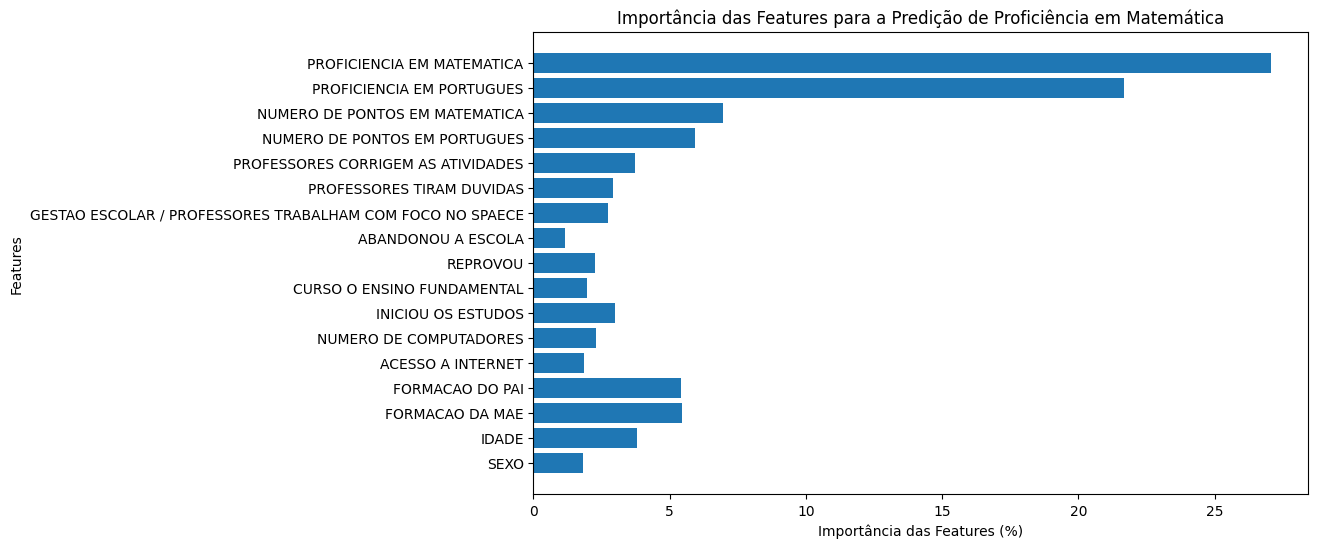

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Remover a coluna "NUMERO DE PONTOS EM MATEMATICA"  do conjunto de features
X = gnetDf.drop(columns=['TURNO ESCOLAR']) # Agora removemos a coluna 'NUMERO DE PONTOS EM MATEMATICA' que possui viés com nossa coluna target juntamente com a coluna target.
y = gnetDf['TURNO ESCOLAR']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de árvore de decisão para regressão
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Calcula a importância das features
feature_importance = model.feature_importances_

# Criar um DataFrame com os resultados
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': feature_importance})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Calcula a porcentagem relativa de cada importância
total_importance = np.sum(feature_importance)
relative_importance = (feature_importance / total_importance) * 100

# Visualizar as features mais importantes
print("Importância das Features:\n", feature_scores)

# Visualização das importâncias das features em porcentagem
plt.figure(figsize=(10, 6))
plt.barh(X.columns, relative_importance)
plt.xlabel('Importância das Features (%)')
plt.ylabel('Features')
plt.title('Importância das Features para a Predição de Proficiência em Matemática')
plt.show()

##### Agora podemos observar a importância que cada feature teve na etapa de treinamento do modelo e selecionar as colunas desejadas para testar os Scores.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### É possível observar os scores obtidos pelo modelo de regressão. Os scores comuns em modelos de regressão são o R² (coeficiente de determinação) e o RMSE (Root Mean Squared Error - Erro Quadrático Médio). O R² é uma medida da proporção da variância na variável dependente que é previsível a partir das variáveis independentes. O RMSE é uma medida da dispersão dos erros de previsão.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o R²
r2 = r2_score(y_test, y_pred)

# Calcular o RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2}")
print(f"RMSE: {rmse}")

R²: -0.9193777571489508
RMSE: 1.5785313174298055


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### - Este código calculará o R² e o RMSE com base nas previsões do modelo no conjunto de teste. Quanto mais próximo de 1 for o R² e quanto menor for o RMSE, melhor será o desempenho do modelo.

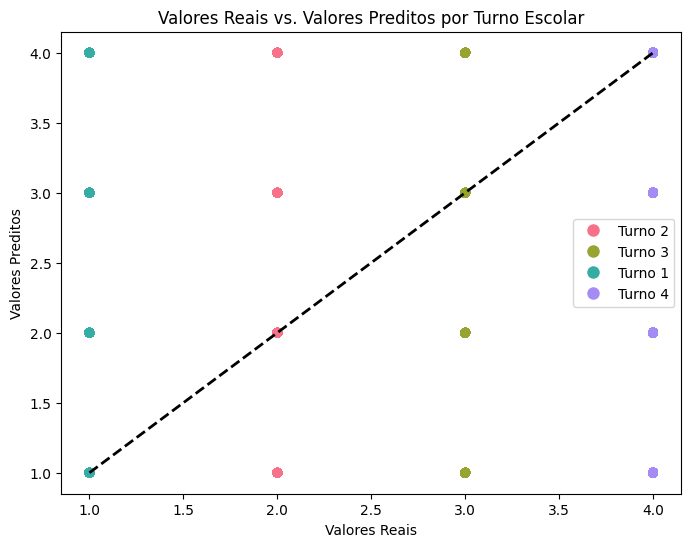

In [ ]:
# Importar a biblioteca seaborn para obter paletas de cores
import seaborn as sns

# Criar uma paleta de cores com uma cor para cada TURNO ESCOLAR
palette = sns.color_palette("husl", len(gnetDf['TURNO ESCOLAR'].unique()))

# Criar um dicionário para mapear cada TURNO ESCOLAR para uma cor na paleta
turno_colors = {turno: cor for turno, cor in zip(gnetDf['TURNO ESCOLAR'].unique(), palette)}

# Criar uma lista de cores correspondentes aos TURNO ESCOLAR de cada amostra
colors = [turno_colors[turno] for turno in gnetDf.loc[y_test.index, 'TURNO ESCOLAR']]

# Plotar o gráfico de dispersão com legenda de cor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c=colors, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Valores Preditos por Turno Escolar')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Turno {turno}') for turno, color in turno_colors.items()])
plt.show()

# Gráfico sem as legendas de cores.
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.xlabel('Valores Reais')
# plt.ylabel('Valores Preditos')
# plt.title('Valores Reais vs. Valores Preditos')
# plt.show()

##### Usamos a função scatter() para plotar os valores reais (y_test) no eixo x e os valores preditos (y_pred) no eixo y. Adicionamos uma linha de referência (linha preta tracejada) que representa a linha onde os valores reais e preditos seriam iguais. Isso nos ajuda a visualizar o quão bem o modelo está fazendo suas previsões. Logo quanto mais próximos da linha tracejada os pontos estiverem, mais precisa a predição do modelo. 

##### - Neste modelo usamos todas as features disponíveis, o que pode ter gerado penalidade nos Scores. Agora só temos que selecionar as melhores features e observar o novo resultado.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 3.2 - Técnicas de Seleção de Features Automáticas do Sklearn


#### O SKlearn oferece várias técnicas para seleção automática de features, incluindo SelectKBest, SelectPercentile, Recursive Feature Elimination (RFE) e SelectFromModel. Essas técnicas utilizam diferentes critérios para selecionar as melhores features, como pontuação de teste estatístico, importância de features em modelos de aprendizado de máquina ou recursão sobre subconjuntos de features.

#### Regressão: Para problemas de regressão, essas técnicas podem ser usadas para identificar as features mais importantes com base em sua contribuição para a precisão do modelo de regressão.

#### Classificação: Para problemas de classificação, essas técnicas podem ser usadas para selecionar as features mais discriminativas com base em sua capacidade de separar as classes no conjunto de dados.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 3.2.1  Exemplo com a abordagem de regressão

##### Nesta abordagem vamos utilizar técnicas de seleção de features automáticas e observar quais features são mais importantes para a predição da variável PROFICIENCIA EM MATEMATICA (assim como fizemos na técnica com a DT demostrado anteriormente), vamos aplicar o SelectKBest com a função de pontuação 'f_regression', que é apropriada para problemas de regressão usando a biblioteca scikit-learn:

                                              Feature         Score
15                          PROFICIENCIA EM PORTUGUES  24989.381603
14                      NUMERO DE PONTOS EM PORTUGUES  23786.631911
13                                      TURNO ESCOLAR   3359.827461
12                 PROFESSORES CORRIGEM AS ATIVIDADES      3.343885
0                                                SEXO      2.234625
5                              NUMERO DE COMPUTADORES      2.154444
3                                     FORMACAO DO PAI      0.804823
11                          PROFESSORES TIRAM DUVIDAS      0.781045
10  GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOC...      0.708707
1                                               IDADE      0.695519
7                          CURSO O ENSINO FUNDAMENTAL      0.597318
4                                   ACESSO A INTERNET      0.451223
9                                  ABANDONOU A ESCOLA      0.303957
2                                     FORMACAO D

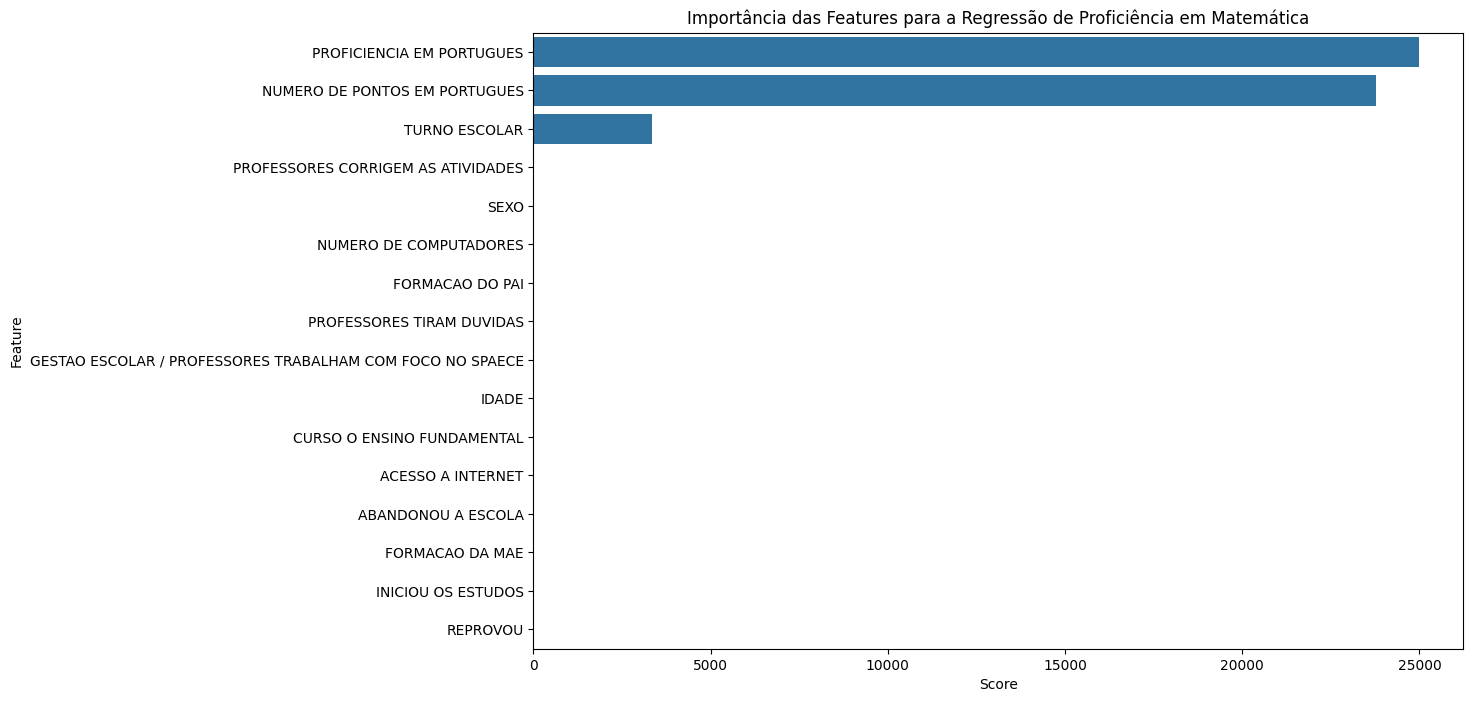

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression


# Separar a variável target (PROFICIENCIA EM MATEMATICA e NUMERO DE PONTOS EM MATEMATICA)
X = gnetDf.drop(columns=['PROFICIENCIA EM MATEMATICA', 'NUMERO DE PONTOS EM MATEMATICA'])
y = gnetDf['PROFICIENCIA EM MATEMATICA']


# Transformar as colunas categóricas em numéricas
X = pd.get_dummies(X, drop_first=True)

# Selecionar as melhores features
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Obter as pontuações das features
scores = selector.scores_

# Criar um DataFrame com os resultados
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Visualizar as features mais importantes
print(feature_scores)

# Plotar as features mais importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Importância das Features para a Regressão de Proficiência em Matemática')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### Com base nos resultados da análise de importância das features para a regressão da PROFICIENCIA EM MATEMATICA, podemos observar o seguinte:

##### PROFICIENCIA EM PORTUGUES (Score: 24989.38):

##### - Esta feature possui a pontuação mais alta, indicando que a proficiência em português é a mais relevante para prever a proficiência em matemática. Isso sugere uma forte correlação entre a proficiência nas duas disciplinas, o que é esperado, pois o desempenho acadêmico em uma matéria pode estar relacionado ao desempenho em outra.


##### NUMERO DE PONTOS EM PORTUGUES (Score: 23786.63):

##### - Esta feature também possui uma pontuação muito alta, logo atrás da proficiência em português. Este resultado reforça ainda mais a relação entre o desempenho em português e em matemática, indicando que os alunos que têm mais pontos em português tendem a ter uma proficiência maior em matemática.

##### TURNO ESCOLAR (Score: 3359.83):

##### - A pontuação do turno escolar é significativamente menor que as duas primeiras, mas ainda assim é a terceira mais alta. Isso sugere que o turno escolar tem uma influência relevante na proficiência em matemática, possivelmente devido a variações na qualidade do ensino ou na disponibilidade de recursos educacionais em diferentes turnos.

##### Os resultados indicam que as features relacionadas ao desempenho em português (PROFICIENCIA EM PORTUGUES e NUMERO DE PONTOS EM PORTUGUES) são de longe as mais relevantes para prever a proficiência em matemática. Isso sugere uma forte interdependência entre o desempenho nas duas disciplinas, da mesma forma que observamos na seleção com a Árvore de Decisão. O turno escolar também tem uma relevância notável, embora menor. As outras features, incluindo fatores sociodemográficos e práticas pedagógicas, têm uma influência muito limitada na proficiência em matemática, de acordo com esta análise.

##### Essas informações podem guiar a seleção de features ao construir um modelo de regressão para prever a proficiência em matemática, potencialmente simplificando o modelo ao focar nas features mais relevantes.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#####

## 3.2.2  Exemplo com a abordagem de Classificação Multiclasse


##### Se a abordagem fosse para um problema de classificação em vez de regressão, o método de seleção de features mudaria principalmente na função de pontuação utilizada. Em vez de usar f_regression para avaliar a relevância das features para um problema de regressão, usaríamos uma função de pontuação adequada para classificação, como 'chi2' (qui-quadrado), 'mutual_info_classif' (informação mútua), ou 'f_classif' (ANOVA F-test).

##### Vamos considerar um exemplo onde queremos classificar a variável PROFICIENCIA EM MATEMATICA em categorias (por exemplo, baixa, média, alta) em vez de prever valores contínuos. A seguir, mostro como usar SelectKBest com a função de pontuação chi2 para selecionar as features mais importantes para um problema de classificação.

                                              Feature         Score
15                          PROFICIENCIA EM PORTUGUES  31176.951250
14                      NUMERO DE PONTOS EM PORTUGUES   7470.825420
13                                      TURNO ESCOLAR    820.839546
3                                     FORMACAO DO PAI      3.651102
7                          CURSO O ENSINO FUNDAMENTAL      1.728020
8                                            REPROVOU      1.658243
2                                     FORMACAO DA MAE      1.393974
9                                  ABANDONOU A ESCOLA      0.681211
6                                  INICIOU OS ESTUDOS      0.625645
5                              NUMERO DE COMPUTADORES      0.473852
4                                   ACESSO A INTERNET      0.459288
12                 PROFESSORES CORRIGEM AS ATIVIDADES      0.384684
0                                                SEXO      0.342348
10  GESTAO ESCOLAR / PROFESSORES TRABALHAM COM F

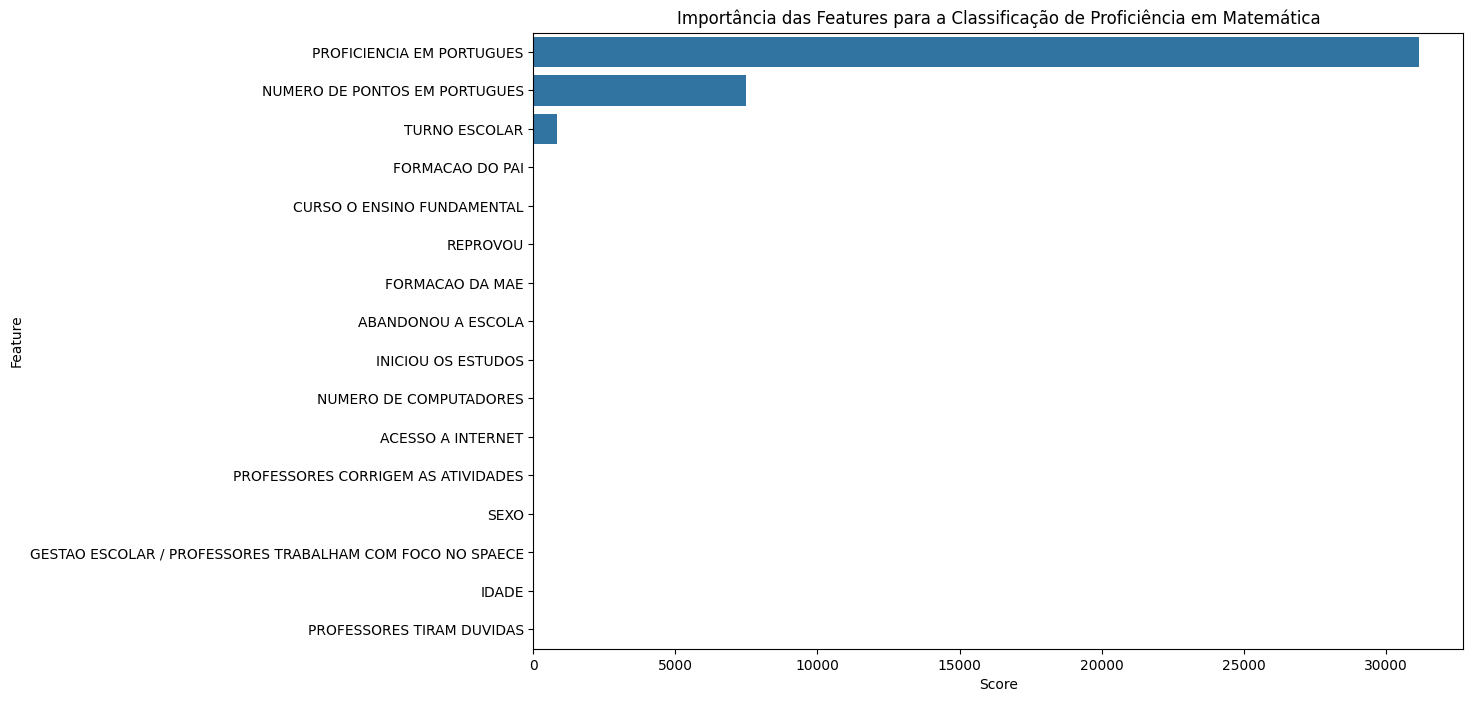

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Transformar a variável target em categorias
# Por exemplo, categorizar a proficiência em matemática em 'baixa', 'média' e 'alta'
bins = [0, 200, 400, np.inf]
labels = ['baixa', 'media', 'alta']
gnetDf['PROFICIENCIA EM MATEMATICA'] = pd.cut(gnetDf['PROFICIENCIA EM MATEMATICA'], bins=bins, labels=labels)

# Codificar a variável target em números
le = LabelEncoder()
y = le.fit_transform(gnetDf['PROFICIENCIA EM MATEMATICA'])

# Separar as features
X = gnetDf.drop(columns=['PROFICIENCIA EM MATEMATICA', 'NUMERO DE PONTOS EM MATEMATICA'])

# Transformar as colunas categóricas em numéricas
X = pd.get_dummies(X, drop_first=True)

# Selecionar as melhores features para classificação
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

# Obter as pontuações das features
scores = selector.scores_

# Criar um DataFrame com os resultados
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Visualizar as features mais importantes
print(feature_scores)

# Plotar as features mais importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Importância das Features para a Classificação de Proficiência em Matemática')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3.2.3 Conclusão:

#####  Foram observadas 3 maneiras de selecionar features para modelos de aprendizagem de máquina. Sendo um método de observação e análise manual e dois métodos utilizando ferramentas disponibilizadas pelo Sklearn.

##### Dentro do contexto destes testes, observamos que:

##### - As features mais importantes para a classificação da "PROFICIENCIA EM MATEMATICA" são fortemente relacionadas ao desempenho em português, reforçando a correlação entre habilidades em diferentes disciplinas.
##### - O turno escolar também mostra ser uma variável importante, assim como a formação dos pais.
##### - Algumas variáveis, embora tradicionalmente consideradas importantes, como acesso a internet e número de computadores, têm menor impacto direto na classificação da proficiência em matemática no contexto deste dataset.

##### Observe que o último teste modificou uma das nossas colunas para uma codificação multiclasse. Portanto devemos carregar o dataset novamente.

In [ ]:
gnetDf

,SEXO,IDADE,FORMACAO DA MAE,FORMACAO DO PAI,ACESSO A INTERNET,NUMERO DE COMPUTADORES,INICIOU OS ESTUDOS,CURSO O ENSINO FUNDAMENTAL,REPROVOU,ABANDONOU A ESCOLA,GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE,PROFESSORES TIRAM DUVIDAS,PROFESSORES CORRIGEM AS ATIVIDADES,TURNO ESCOLAR,NUMERO DE PONTOS EM PORTUGUES,NUMERO DE PONTOS EM MATEMATICA,PROFICIENCIA EM PORTUGUES,PROFICIENCIA EM MATEMATICA
0,1,17,1,3,0,1,3,1,0,0,2,2,2,2,11,8,252.90,media
1,1,18,0,3,0,1,5,1,0,0,2,3,3,2,16,9,281.74,media
2,1,17,0,3,0,1,5,1,0,0,3,2,2,2,8,5,224.17,media
3,1,17,0,3,0,1,3,3,0,0,1,1,1,2,17,6,281.61,media
4,2,17,0,3,0,1,5,1,0,0,2,2,2,2,18,5,301.68,media
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52489,1,17,3,1,1,2,7,2,0,1,0,1,1,4,13,7,275.88,media
52490,1,19,3,1,1,2,5,3,0,0,3,3,3,4,22,8,335.27,media
52491,2,19,3,1,1,2,5,1,0,1,3,2,1,4,22,6,334.70,media
52492,2,18,3,1,1,2,5,1,0,0,2,2,2,4,20,8,323.70,media


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
## Para recuperar o dataset original
gnetDf = pd.read_csv("datasets/SPAECE_2018_codificado.csv", encoding='latin1')

In [ ]:
gnetDf

,SEXO,IDADE,FORMACAO DA MAE,FORMACAO DO PAI,ACESSO A INTERNET,NUMERO DE COMPUTADORES,INICIOU OS ESTUDOS,CURSO O ENSINO FUNDAMENTAL,REPROVOU,ABANDONOU A ESCOLA,GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE,PROFESSORES TIRAM DUVIDAS,PROFESSORES CORRIGEM AS ATIVIDADES,TURNO ESCOLAR,NUMERO DE PONTOS EM PORTUGUES,NUMERO DE PONTOS EM MATEMATICA,PROFICIENCIA EM PORTUGUES,PROFICIENCIA EM MATEMATICA
0,1,17,1,3,0,1,3,1,0,0,2,2,2,2,11,8,252.90,285.73
1,1,18,0,3,0,1,5,1,0,0,2,3,3,2,16,9,281.74,306.30
2,1,17,0,3,0,1,5,1,0,0,3,2,2,2,8,5,224.17,243.40
3,1,17,0,3,0,1,3,3,0,0,1,1,1,2,17,6,281.61,268.13
4,2,17,0,3,0,1,5,1,0,0,2,2,2,2,18,5,301.68,240.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52489,1,17,3,1,1,2,7,2,0,1,0,1,1,4,13,7,275.88,259.11
52490,1,19,3,1,1,2,5,3,0,0,3,3,3,4,22,8,335.27,304.96
52491,2,19,3,1,1,2,5,1,0,1,3,2,1,4,22,6,334.70,251.84
52492,2,18,3,1,1,2,5,1,0,0,2,2,2,4,20,8,323.70,261.49


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##

##